In [1]:
import matplotlib.patches as mpatches
import numpy as np
import os
import math
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
params = {
   'axes.labelsize': 12,
   'font.size': 10,
   'legend.fontsize': 11,
   'xtick.labelsize': 10,
   'ytick.labelsize': 12,
   'text.usetex': False,
   'figure.figsize': [10, 2] # instead of 4.5, 4.5
   }
plt.rcParams.update(params)

## helper function

In [3]:
def autolabel(rects, ses):
    # attach some text labels
    for rect, se in zip(rects, ses):
        height = rect.get_height()
        plt.axes().text(rect.get_x()+rect.get_width()/2., height+1.03*se, '{:2.3f}'.format(float(height)).lstrip('0'),
                ha='center', va='bottom',fontsize=10)

## Fixed Parameter

In [4]:
# experiment
exp = 'overfit'
exp_label = 'Time Segment Matching on Switched W'

# dictionaries
cl_dict = {0:1/225,1:2/297,2:2/297,3:2/1973} # chance level of each dataset
feat_dict = {'srm':[75,75,50],'ica':[50,25,25],'gica':[100,50,25],'dict':[25,25,25]}
roi_dict = {'dmn':0,'pt':1,'eac':2}
md_dict = {'ica':'ICA','gica':'Group-ICA','dict':'Dict','srm':'SRM'}
ds_dict = {0:'GreenEyes',1:'Milky',2:'Vodka',3:'Sherlock'}
md_pre = 'indv_'
lg_lb = ['Own W','Switched W']

# paths
input_file = '../../output/accu_bar/{}/{}/{}_ds{}.npz' #exp,roi,model,ds
output_path = '../../output/figures/{}/' #exp
if not os.path.exists(output_path.format(exp)):
    os.makedirs(output_path.format(exp))
output_file = output_path+'{}_ds{}' #roi,ds

## Plotting Parameter

In [9]:
max_accu = 0.4
roi_all = ['dmn','pt','eac']
ds_all = [[0,1],[0,2],[0,3],[1,3]]
model_all = ['ica','gica','dict','srm']

## Aggregate Accuracy

In [6]:
# Accuracies
all_mean = [] # length # of roi
all_se = [] # length # of roi
# aggregate each roi
for roi in roi_all:
    roi_mean = []
    roi_se = []
    for ds in ds_all:
        ds_mean = []
        ds_se = []
        for model in model_all:
            ws=np.load(input_file.format(exp,roi,md_pre+model,ds).replace(' ',''))
            ds_mean.extend(list(ws['mean']))
            ds_se.extend(list(ws['se']))
        roi_mean.append(ds_mean) 
        roi_se.append(ds_se)
    all_mean.append(roi_mean)
    all_se.append(roi_se)

## Plot all roi

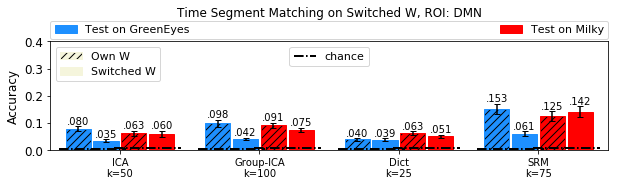

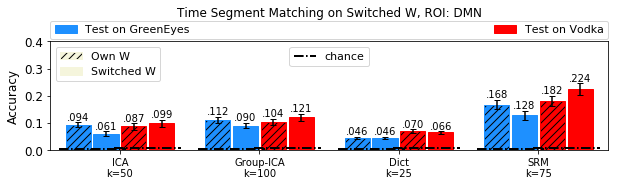

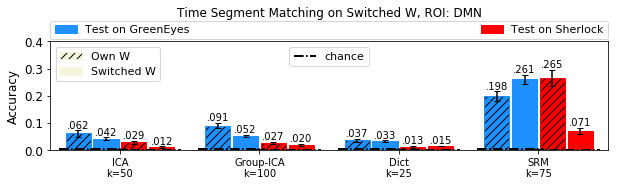

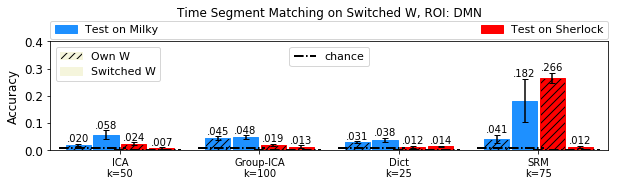

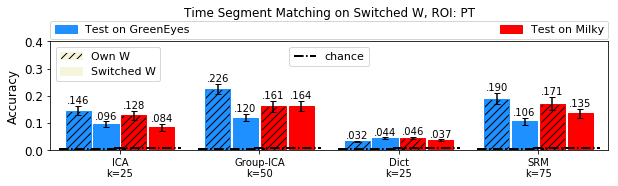

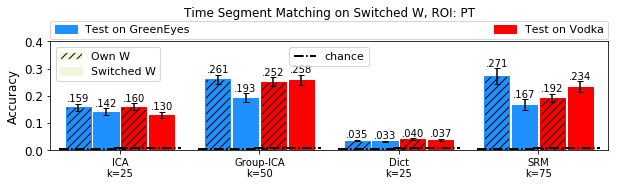

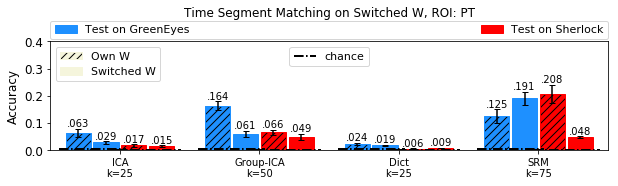

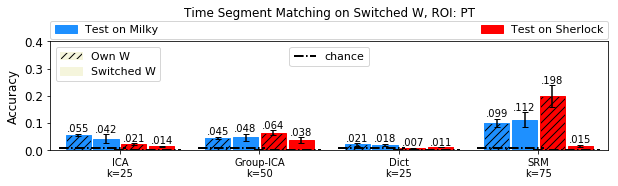

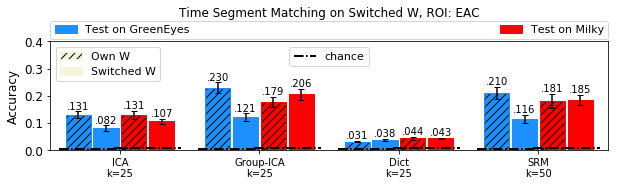

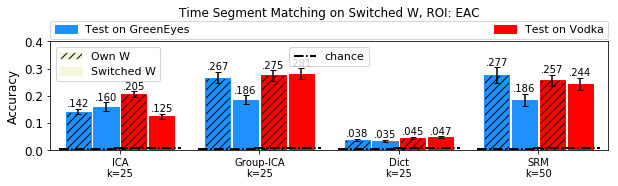

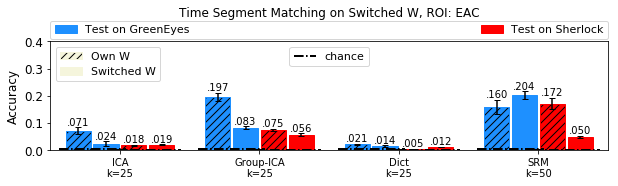

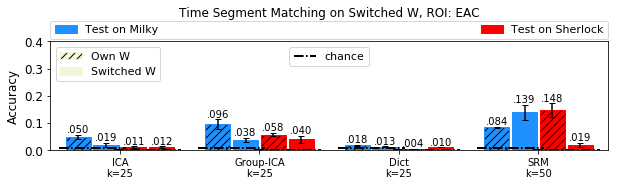

In [10]:
width=1
nmodel = 4 
ndata = len(model_all) # number of models
group_width = 1.25*width*nmodel
center_all = np.linspace(0,group_width*(ndata-1),ndata)
# set colors
color_all = ['dodgerblue','dodgerblue','red','red']
pattern = ['///',' ']

for m,roi in enumerate(roi_all):
    for r,ds in enumerate(ds_all):
        xtick_idx = []
        xtick_name = []
        plt.figure()
        # configure bars
        for i,(model, center) in enumerate(zip(model_all,center_all)):
            mean = list(all_mean[m][r][i*nmodel:(i+1)*nmodel])
            se   = list(all_se[m][r][i*nmodel:(i+1)*nmodel])    
            idx = np.arange(center,center+nmodel*width,width)
            error_config = {'ecolor': '0','capsize':3}   
            rects = plt.bar(idx, mean, yerr=se, align='center', error_kw=error_config, width = width-0.1)
            # set colors
            for rect_i in range(len(rects)):
                rects[rect_i].set_color(color_all[rect_i])
            # add patterns
            for rect_i in range(0,len(rects),2):
                rects[rect_i].set_hatch(pattern[0])
            autolabel(rects, se)
            xtick_idx.append(center+(nmodel-1)*width/2)
            feat = str(feat_dict[model][roi_dict[roi]])
            xtick_name.append(md_dict[model]+'\nk='+feat)
            
        plt.xticks(xtick_idx,xtick_name)
        plt.ylabel('Accuracy')
        left_lim = center_all[0]-0.5*width-0.5
        right_lim = center_all[-1]+(nmodel-0.5)*width+0.5
        plt.xlim([left_lim,right_lim])
        plt.ylim([0,max_accu])

        # plot chance accuracy of each dataset
        for center in center_all:
            cl1 = cl_dict[ds[0]]
            line = plt.plot([center-0.7*width, center+1.7*width], [cl1, cl1], 'k-.', linewidth=2)
            cl2 = cl_dict[ds[1]]
            line = plt.plot([center+1.3*width, center+3.7*width], [cl2, cl2], 'k-.', linewidth=2)

        # Add texts
        plt.text((right_lim+left_lim)/2, 1.2*max_accu, exp_label+', ROI: '+roi.upper(),fontsize=12,horizontalalignment='center', verticalalignment='bottom')

        # legend
        legend_handle = []
        for patch_i in range(2):
            legend_handle.append(mpatches.Patch(color=color_all[2*patch_i], label='Test on '+ds_dict[ds[patch_i]]))       
        l1 = plt.legend(handles=legend_handle,bbox_to_anchor=(0.,1.02,1.,.102), loc=3,ncol=2,mode="expand", borderaxespad=0.)
        ax = plt.gca().add_artist(l1)
        l2 = plt.legend(line ,['chance'],loc=9,ncol=1)
        ax = plt.gca().add_artist(l2)
        legend_handle2 = []
        for patch_i in range(2):
            legend_handle2.append(mpatches.Patch(hatch=pattern[patch_i], color='beige',label=lg_lb[patch_i]))        
        plt.legend(handles=legend_handle2,loc=2,ncol=1)

    #     plt.savefig(output_file.format(exp,roi,ds).replace(' ','')+'.eps', format='eps', dpi=200,bbox_inches='tight')
        plt.savefig(output_file.format(exp,roi,ds).replace(' ','')+'.pdf', format='pdf', dpi=200,bbox_inches='tight')